In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Load California housing dataset
housing = fetch_california_housing()
X = housing.data
Y = housing.target
feature_names = housing.feature_names

# Print dataset description
print(housing.DESCR)

# Get dimensions
n, p = X.shape
print(f"\nDataset contains {n} samples with {p} features each")
print("Feature names:", feature_names)

# Use "AveRooms" (average rooms per dwelling)
rm = X[:, 3]  # Column 3 = AveRooms

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
def relation_rm_medv(rm, means):
    """Plot and calculate correlation between rooms and home value"""
    plt.figure(figsize=(10, 6))
    plt.scatter(rm, means, alpha=0.25)
    plt.title("Average Rooms vs Median House Value")
    plt.xlabel("Average Rooms per Dwelling")
    plt.ylabel("Median House Value ($100,000s)")
    plt.grid(True)
    plt.show()
    correlation = np.corrcoef(rm, means)[0, 1]
    print(f"Correlation between rooms and house value: {correlation:.4f}")
    return correlation

def price_mean(rm, means, min_rooms=5, max_rooms=6):
    """Calculate average price for homes with rooms between min and max"""
    mask = (rm > min_rooms) & (rm < max_rooms)
    filtered_means = means[mask]
    avg_price = np.mean(filtered_means) * 100000  # Convert to dollars
    print(f"Average price for homes with {min_rooms}-{max_rooms} rooms: ${avg_price:,.2f}")
    return avg_price

def medv_hist(medv):
    """Plot histogram of median home values"""
    plt.figure(figsize=(10, 6))
    plt.hist(medv, bins=50, edgecolor='black')
    plt.title("Distribution of Median House Values")
    plt.xlabel("House Value ($100,000s)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

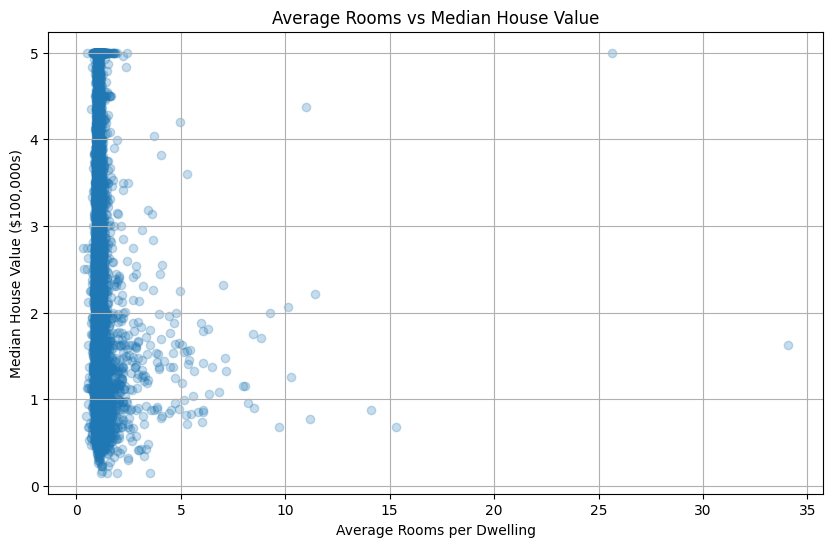

Correlation between rooms and house value: -0.0467
Average price for homes with 5-6 rooms: $139,806.25


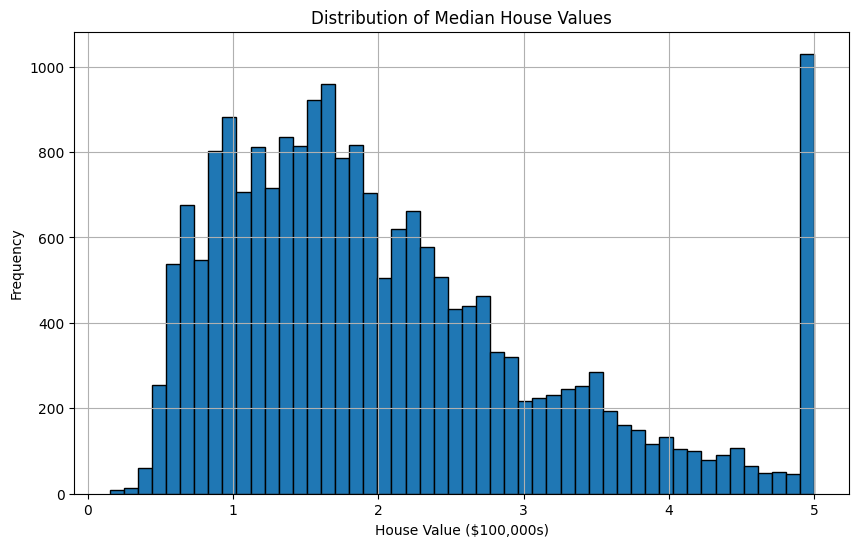

In [4]:
# Run exploration functions
corr = relation_rm_medv(rm, Y)
avg_price = price_mean(rm, Y)
medv_hist(Y)

In [6]:
def linear_regression(x, y):
    """Manual linear regression implementation"""
    # Add bias term (column of ones)
    x_with_bias = np.c_[np.ones(x.shape[0]), x]
    # Normal equation: w = (XᵀX)⁻¹XᵀY
    w = np.linalg.inv(x_with_bias.T @ x_with_bias) @ x_with_bias.T @ y
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.25, label='Actual values')
    plt.plot(x, x_with_bias @ w, color='red', linewidth=2, label='Regression line')
    plt.title("Linear Regression: Rooms vs House Value")
    plt.xlabel("Average Rooms per Dwelling")
    plt.ylabel("Median House Value ($100,000s)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return w, x_with_bias @ w

def predict_from_room_number(room_number, w):
    """Predict price given number of rooms"""
    return (w[0] + w[1] * room_number) * 100000  # Convert to dollars

def predict_from_price(price, w):
    """Predict room number given price"""
    return (price/100000 - w[0]) / w[1]

def get_mse(y_pred, y_true):
    """Calculate mean squared error"""
    return np.mean((y_pred - y_true)**2)

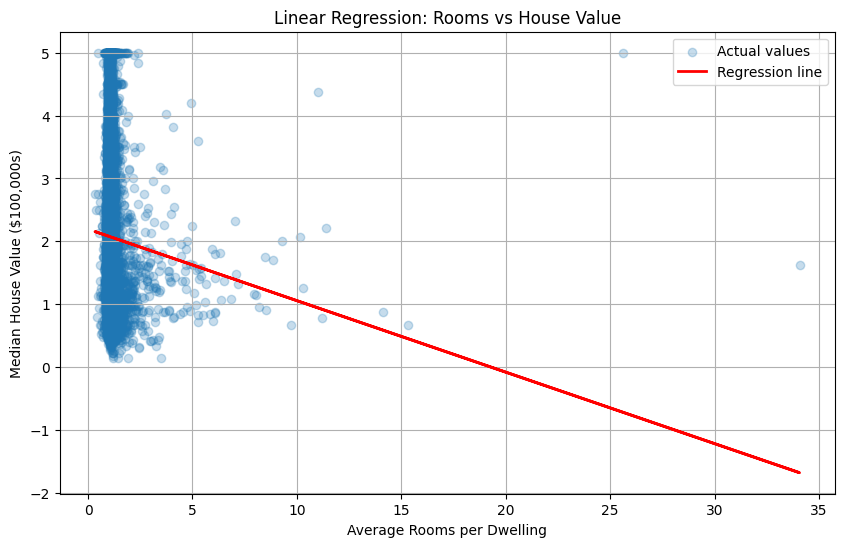


Regression coefficients (manual implementation):
Intercept (w0): 2.1933
Slope (w1): -0.1137

Predicted price for 5.5 rooms: $156,783.81
Predicted rooms for $250,000: -2.70

Manual implementation MSE: 1.3286


In [7]:
# Run regression
w, y_pred = linear_regression(rm, Y)
print("\nRegression coefficients (manual implementation):")
print(f"Intercept (w0): {w[0]:.4f}")
print(f"Slope (w1): {w[1]:.4f}")

# Example predictions
test_rooms = 5.5
predicted_price = predict_from_room_number(test_rooms, w)
print(f"\nPredicted price for {test_rooms} rooms: ${predicted_price:,.2f}")

test_price = 250000
predicted_rooms = predict_from_price(test_price, w)
print(f"Predicted rooms for ${test_price:,}: {predicted_rooms:.2f}")

# Calculate MSE
manual_mse = get_mse(y_pred, Y)
print(f"\nManual implementation MSE: {manual_mse:.4f}")

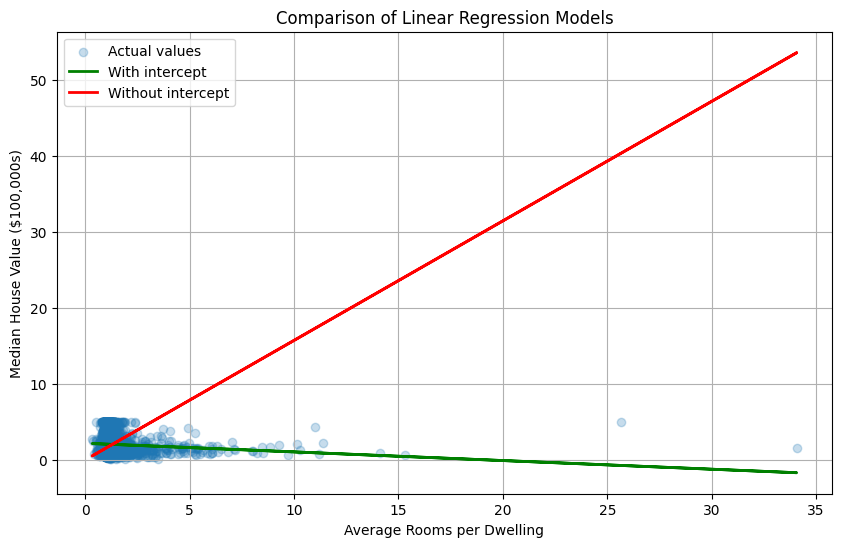


Sklearn model with intercept:
Intercept: 2.1933
Coefficient: -0.1137
MSE: 1.3286

Sklearn model without intercept:
Intercept: 0.0000
Coefficient: 1.5715
MSE: 2.0856


In [8]:
def use_sklearn(x, y):
    """Compare with sklearn's implementation"""
    x = x.reshape(-1, 1)  # Reshape for sklearn
    
    # Model with intercept
    model_with_intercept = linear_model.LinearRegression().fit(x, y)
    y_pred_with = model_with_intercept.predict(x)
    mse_with = mean_squared_error(y, y_pred_with)
    
    # Model without intercept
    model_no_intercept = linear_model.LinearRegression(fit_intercept=False).fit(x, y)
    y_pred_without = model_no_intercept.predict(x)
    mse_without = mean_squared_error(y, y_pred_without)
    
    # Plot comparison
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.25, label='Actual values')
    plt.plot(x, y_pred_with, color='green', linewidth=2, label='With intercept')
    plt.plot(x, y_pred_without, color='red', linewidth=2, label='Without intercept')
    plt.title("Comparison of Linear Regression Models")
    plt.xlabel("Average Rooms per Dwelling")
    plt.ylabel("Median House Value ($100,000s)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("\nSklearn model with intercept:")
    print(f"Intercept: {model_with_intercept.intercept_:.4f}")
    print(f"Coefficient: {model_with_intercept.coef_[0]:.4f}")
    print(f"MSE: {mse_with:.4f}")
    
    print("\nSklearn model without intercept:")
    print(f"Intercept: {model_no_intercept.intercept_:.4f}")
    print(f"Coefficient: {model_no_intercept.coef_[0]:.4f}")
    print(f"MSE: {mse_without:.4f}")

use_sklearn(rm, Y)

In [9]:
def multiple_regression(X, y):
    """Perform multiple regression with selected features"""
    # Select features: AveRooms (3), Latitude (6), MedInc (0)
    selected_features = X[:, [3, 6, 0]]
    
    # Add bias term
    X_with_bias = np.c_[np.ones(X.shape[0]), selected_features]
    
    # Manual calculation
    w = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
    y_pred = X_with_bias @ w
    
    # Sklearn calculation
    model = linear_model.LinearRegression().fit(selected_features, y)
    
    print("\nMultiple Regression Results:")
    print("\nManual implementation coefficients:")
    print(f"Intercept: {w[0]:.4f}")
    print(f"AveRooms coef: {w[1]:.4f}")
    print(f"Latitude coef: {w[2]:.4f}")
    print(f"MedInc coef: {w[3]:.4f}")
    
    print("\nSklearn coefficients:")
    print(f"Intercept: {model.intercept_:.4f}")
    print("Feature coefficients:", model.coef_)
    
    print(f"\nManual MSE: {get_mse(y_pred, y):.4f}")
    print(f"Sklearn MSE: {mean_squared_error(y, model.predict(selected_features)):.4f}")

multiple_regression(X, Y)


Multiple Regression Results:

Manual implementation coefficients:
Intercept: 2.1939
AveRooms coef: 0.0044
Latitude coef: -0.0486
MedInc coef: 0.4136

Sklearn coefficients:
Intercept: 2.1939
Feature coefficients: [ 0.00443145 -0.04858843  0.4136473 ]

Manual MSE: 0.6905
Sklearn MSE: 0.6905
